![](http://www.dataivy.cn/book/images/head.png)
<table align="center" bgcolor="#FFFFFF" border="0px">
   <tr bgcolor="#FFFFFF">
      <td><img src="http://www.dataivy.cn/book/images/release_date.svg"></td>
      <td><img src="http://www.dataivy.cn/book/images/python-3.7-green.svg"></td>
      <td><a href="http://www.dataivy.cn/blog/python_book_faq/"><img src="http://www.dataivy.cn/book/images/faq-visit_site-blue.svg"></a></td>
      <td><a href="http://www.dataivy.cn/blog/python_book_knows_issues/"><img src="http://www.dataivy.cn/book/images/known_issues.svg"></a></td>
   </tr>
</table>


<hr />

<div align="center"><h1> 第六章&nbsp;&nbsp;商品数据化运营</h1></div>

# 一、案例-基于Gradient Boosting的自动超参数优化的销售预测

## 说明

- 描述：“代码实操”以及内容延伸部分源代码
- 时间：2019-01-01
- 作者：宋天龙（Tony Song）
- 程序开发环境：win7 64位
- Python版本：64位 3.7
- 依赖库：numpy、pandas、sklearn、matplotlib
- 程序输入：products_sales.txt
- 程序输出：新数据集预测销售量

## 程序

### 导入库

In [1]:
import numpy as np  # 导入numpy库
import pandas as pd  # 导入pandas库
from sklearn.ensemble import GradientBoostingRegressor  # 集成方法回归库
from sklearn.model_selection import GridSearchCV  # 导入交叉检验库
import matplotlib.pyplot as plt  # 导入图形展示库
from sklearn.metrics import mean_squared_error as mse

### 读取数据

In [2]:
raw_data = pd.read_table('products_sales.txt', delimiter=',')

### 数据审查

In [3]:
# 数据概览
print('{:*^60}'.format('Data overview:'),'\n',raw_data.tail(2))#打印原始数据后2条
print('{:*^60}'.format('Data dtypes:'),'\n',raw_data.dtypes)# 数据类型

***********************Data overview:*********************** 
      limit_infor  campaign_type  campaign_level  product_level  \
729            0              6               0              1   
730            0              6               0              1   

     resource_amount  email_rate  price  discount_rate  hour_resouces  \
729                8         0.8  150.0           0.87            987   
730                9         0.8  149.0           0.84           1448   

     campaign_fee  orders  
729          2298    3285  
730          3392    4840  
************************Data dtypes:************************ 
 limit_infor          int64
campaign_type        int64
campaign_level       int64
product_level        int64
resource_amount      int64
email_rate         float64
price              float64
discount_rate      float64
hour_resouces        int64
campaign_fee         int64
orders               int64
dtype: object


In [4]:
# 缺失值审查
na_cols = raw_data.isnull().any(axis=0)  # 查看每一列是否具有缺失值
print('{:*^60}'.format('NA Cols:'))
print(na_cols[na_cols]==True)  # 查看具有缺失值的列
print('Total NA lines is: {0}'.format(raw_data.isnull().any(axis=1).sum()))  # 查看具有缺失值的行总记录数

**************************NA Cols:**************************
price    True
dtype: bool
Total NA lines is: 2


### 数据预处理

In [5]:
# 缺失值处理
sales_data = raw_data.fillna(raw_data['price'].mean())  # 缺失值替换为均值

In [6]:
# 分割数据集X和y
num = int(0.7*sales_data.shape[0])
X,y = sales_data.iloc[:, :-1],sales_data.iloc[:, -1]
X_train,X_test = X.iloc[:num,:],X.iloc[num:,:]
y_train,y_test = y.iloc[:num],y.iloc[num:]

### 模型训练

In [7]:
# 模型最优化参数训练及检验
model_gbr = GradientBoostingRegressor()  # 建立GradientBoostingRegressor回归对象
parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'n_estimators': [10, 50, 100],
              'learning_rate': [0.05, 0.1, 0.15],
              'max_depth': [2, 3, 4],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 2, 4]}  # 定义要优化的参数信息
model_gs = GridSearchCV(estimator=model_gbr,
                        param_grid=parameters, cv=3, n_jobs=-1)  # 建立交叉检验模型对象
model_gs.fit(X_train, y_train)  # 训练交叉检验模型
print('Best score is:', model_gs.best_score_)  # 获得交叉检验模型得出的最优得分
print('Best parameter is:', model_gs.best_params_)  # 获得交叉检验模型得出的最优参数

Best score is: 0.9553329459997294
Best parameter is: {'learning_rate': 0.15, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# 获取最佳训练模型
model_best = model_gs.best_estimator_  # 获得交叉检验模型得出的最优模型对象

### 模型评估

In [9]:
# 模型交叉检验结果
# print(model_gs.cv_results_.keys())
model_gs.cv_results_.get('mean_test_score')

array([-0.30581615,  0.80650464,  0.91516235, ..., -2.36797955,
        0.37439887,  0.59044842])

In [10]:
# 回归指标评估
pre_test = model_best.predict(X_test)
mse_score = mse(pre_test,y_test)

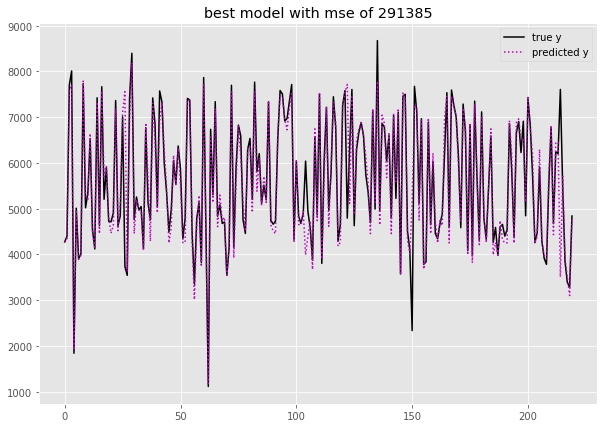

In [11]:
# 模型拟合程度
plt.style.use("ggplot")  # 应用ggplot自带样式库
plt.figure(figsize=(10,7))  # 建立画布对象
plt.plot(np.arange(X_test.shape[0]), y_test, linestyle='-', color='k', label='true y')  # 画出原始变量的曲线
plt.plot(np.arange(X_test.shape[0]), pre_test, linestyle=':', color='m',
         label='predicted y')  # 画出预测变量曲线
plt.title('best model with mse of {}'.format(int(mse_score)))
plt.legend(loc=0)  # 设置图例位置

### 新数据集预测

In [12]:
New_X = np.array([[1, 1, 0, 1, 15, 0.5, 177, 0.66, 101, 798]])  # 要预测的新数据记录
print('{:*^60}'.format('Predicted orders:'))
print(model_best.predict(New_X).round(0))  # 打印输出预测值

*********************Predicted orders:**********************
[833.]


# 二、案例-基于集成算法AdaBoost、GradientBoosting、RandomForest和Bagging的投票组合模型的异常检测

## 说明

- 描述：“代码实操”以及内容延伸部分源代码
- 时间：2019-01-01
- 作者：宋天龙（Tony Song）
- 程序开发环境：win7 64位
- Python版本：64位 3.7
- 依赖库：numpy、pandas、sklearn、imblearn
- 程序输入：abnormal_orders.txt
- 程序输出：预测数据直接打印输出

## 程序

### 导入库

In [16]:
import numpy as np
import pandas as pd  # pandas库
from imblearn.over_sampling import SMOTE  # 过抽样处理库SMOTE
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, \
    RandomForestClassifier  # 四种集成分类库和投票方法库
from sklearn.model_selection import StratifiedKFold, cross_val_score  # 导入交叉检验算法
from sklearn.preprocessing import OrdinalEncoder  # 字符串转数值

### 函数模块

In [2]:
# 日期和时间拓展
def datetime_exp(data):
    '''
    将日期和时间数据拓展出其他属性，例如星期几、周几、小时、分钟等。
    :param data: 数据集
    :return: 拓展后的属性矩阵
    '''
    date_set = [pd.datetime.strptime(dates, '%Y-%m-%d') for dates in
                data['order_date']]  # 将data中的order_date列转换为特定日期格式
    data['weekday_data'] = [data.weekday() for data in date_set]  # 周几
    data['daysinmonth_data'] = [data.day for data in date_set]  # 当月几号
    data['month_data'] = [data.month for data in date_set]  # 月份

    time_set = [pd.datetime.strptime(times, '%H:%M:%S') for times in
                data['order_time']]  # 将data中的order_time列转换为特定时间格式
    data['second_data'] = [data.second for data in time_set]  # 秒
    data['minute_data'] = [data.minute for data in time_set]  # 分钟
    data['hour_data'] = [data.hour for data in time_set]  # 小时
    return data.drop(['order_date','order_time'],axis=1)


### 读取数据

In [3]:
raw_data = pd.read_table('abnormal_orders.txt', delimiter=',')  # 读取数据集

### 数据审查

In [4]:
# 查看基本状态
print('{:*^60}'.format('Data overview:'))
print(raw_data.tail(2))  # 打印原始数据后2条
print('{:*^60}'.format('Data dtypes:'))
print(raw_data.dtypes)  # 打印数据类型
print('{:*^60}'.format('Data DESC:'))
print(raw_data.describe().round(2).T)  # 打印原始数据基本描述性信息

***********************Data overview:***********************
          order_id  order_date order_time       cat attribution      pro_id  \
134188  4285770012  2013-09-19   23:55:06      家居日用          GO  1000335947   
134189  4285770056  2013-05-20   23:58:59  生活电器厨卫电器          GO  1000009280   

       pro_brand  total_money  total_quantity order_source pay_type  \
134188       炊大师         79.0               1           抢购     合并支付   
134189        海尔        799.0               1           抢购     合并支付   

           user_id city  abnormal_label  
134188      shukun  东莞市               0  
134189  544975322_  海口市               0  
************************Data dtypes:************************
order_id            int64
order_date         object
order_time         object
cat                object
attribution        object
pro_id              int64
pro_brand          object
total_money       float64
total_quantity      int64
order_source       object
pay_type           object
user_id       

In [5]:
# 缺失值审查
na_cols = raw_data.isnull().any(axis=0)  # 查看每一列是否具有缺失值
print('{:*^60}'.format('NA Cols:'))
print(na_cols[na_cols==True])  # 查看具有缺失值的列
print('Total number of NA lines is: {0}'.format(
    raw_data.isnull().any(axis=1).sum()))  # 查看具有缺失值的行总记录数

**************************NA Cols:**************************
cat            True
pro_brand      True
total_money    True
city           True
dtype: bool
Total number of NA lines is: 1429


In [6]:
# 样本均衡审查
print('{:*^60}'.format('Labesl samples count:'))
print(raw_data.iloc[:, -1].value_counts())

*******************Labesl samples count:********************
0    105733
1     28457
Name: abnormal_label, dtype: int64


### 数据预处理

In [7]:
# Nan处理
drop_na_set = raw_data.dropna()  # 丢弃

In [8]:
# 丢弃订单ID列
drop_na_set = drop_na_set.drop(['order_id'],axis=1)

In [9]:
# 字符串转数值
convert_cols = ['cat', 'attribution', 'pro_id', 'pro_brand', 'order_source', 'pay_type','user_id', 'city']  # 定义要转换的列
enc = OrdinalEncoder()
drop_na_set[convert_cols]=enc.fit_transform(drop_na_set[convert_cols])

In [10]:
# 日期特征拓展
data_final = datetime_exp(drop_na_set)

In [11]:
# 分割测试集和训练集X和y
num = int(0.7*data_final.shape[0])
X_raw, y_raw = data_final.drop(['abnormal_label'],axis=1), data_final['abnormal_label']  
X_train,X_test = X_raw.iloc[:num,:],X_raw.iloc[num:,:]
y_train,y_test = y_raw.iloc[:num],y_raw.iloc[num:]

In [12]:
# 样本均衡
model_smote = SMOTE()  # 建立SMOTE模型对象
x_smote_resampled, y_smote_resampled = model_smote.fit_sample(X_train, y_train)  # 输入数据并作过抽样处理

### 模型训练

In [13]:
# 交叉检验
model_rf = RandomForestClassifier(max_features=0.8, random_state=0)  # 随机森林分类模型对象
model_gdbc = GradientBoostingClassifier(max_features=0.8, random_state=0)  # GradientBoosting分类模型对象
estimators = [('randomforest', model_rf), ('gradientboosting', model_gdbc)]  # 建立组合评估器列表
model_vot = VotingClassifier(estimators=estimators, voting='soft', weights=[0.9, 1.2],
                             n_jobs=-1)  # 建立组合评估模型
cv = StratifiedKFold(5, random_state=2)  # 设置交叉检验方法
cv_score = cross_val_score(model_gdbc, x_smote_resampled, y_smote_resampled, cv=cv)  # 交叉检验
print('{:*^60}'.format('Cross val scores:'),'\n',cv_score) # 打印每次交叉检验得分
print('Mean scores is: %.2f' % cv_score.mean())  # 打印平均交叉检验得分

*********************Cross val scores:********************** 
 [0.53665893 0.7974478  0.9446249  0.87760074 0.81158636]
Mean scores is: 0.79


In [14]:
# 训练模型
model_vot.fit(x_smote_resampled, y_smote_resampled)  # 模型训练

VotingClassifier(estimators=[('randomforest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=-1, voting='soft',
         weights=[0.9, 1.2])

### 新数据集做预测

In [17]:
# 读取新数据集
X_new = pd.read_csv('new_abnormal_orders.csv')
# 丢弃订单ID列
X_new_drop = X_new.drop(['order_id'], axis=1)
# 字符串转数值
X_new_drop[convert_cols] = enc.transform(X_new_drop[convert_cols])
# 日期特征拓展
X_new_final = datetime_exp(X_new_drop)
# 预测结果
predict_label = model_vot.predict(X_new_final)
predict_proba = model_vot.predict_proba(X_new_final)
predict_np = np.hstack((predict_label.reshape(-1,1),predict_proba))
predict_pd = pd.DataFrame(predict_np,columns=['lables','proba_0','proba_1'])
print('{:*^60}'.format('Predicted Labesls:'), '\n', predict_pd)

*********************Predicted Labesls:********************* 
    lables   proba_0   proba_1
0     1.0  0.430347  0.569653
1     0.0  0.706741  0.293259
2     0.0  0.987728  0.012272
3     0.0  0.991092  0.008908
4     0.0  0.993395  0.006605
5     0.0  0.758719  0.241281
6     0.0  0.759313  0.240687
